In [1]:
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
### FACIAL EMOTION RECOGNITION USING FER2013 DATASET ###
import pandas as pd
import cv2 as cv
import numpy as np
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizer_v2.rmsprop import RMSProp
import os
import glob
import tqdm




In [3]:
### PREPARTING FACIAL EMOTION DATASET ###
df=pd.read_csv('C:/Users/````````````````````/Desktop/ComputerVision/Resources/Resources/fer2013.csv')
CLASSES={0:'Angry',1:'Disgust',2:'Fear',3:'Happiness',4:'Neutral',5:'Sadness',6:'Surprise'}
df['emotion'].replace(CLASSES,inplace=True)
df['emotion'].value_counts()

emotion
Happiness    8989
Surprise     6198
Neutral      6077
Fear         5121
Angry        4953
Sadness      4002
Disgust       547
Name: count, dtype: int64

In [4]:
### SELECTING 500 FACES IN EACH CLASSES ###
dfs=[]
for c in CLASSES.values():
    dfs.append(df[df['emotion']==c].head(500))
df=pd.concat(dfs)
df['emotion'].value_counts()

emotion
Angry        500
Disgust      500
Fear         500
Happiness    500
Neutral      500
Sadness      500
Surprise     500
Name: count, dtype: int64

In [5]:
fe_data=[]
for row in df.values:
    e=row[0]
    pixels=list(map(int,row[1].split(' ')))
    fe_data.append(pixels+[e])
df=pd.DataFrame(fe_data,
                columns=['p{0}'.format(v+1) for v in range(len(pixels))]+['emotion'])
df

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p2296,p2297,p2298,p2299,p2300,p2301,p2302,p2303,p2304,emotion
0,70,80,82,72,58,58,60,63,54,58,...,182,183,136,106,116,95,106,109,82,Angry
1,151,150,147,155,148,133,111,140,170,174,...,108,95,108,102,67,171,193,183,184,Angry
2,30,24,21,23,25,25,49,67,84,103,...,106,111,148,137,176,174,172,173,173,Angry
3,123,125,124,142,209,226,234,236,231,232,...,103,116,111,105,105,103,97,91,89,Angry
4,8,9,14,21,26,32,37,46,52,62,...,74,75,74,80,91,101,103,122,130,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,65,58,49,50,53,45,46,46,80,90,...,89,80,86,141,152,143,143,135,129,Surprise
3496,59,58,38,30,24,13,24,9,14,19,...,19,19,6,36,126,111,88,93,114,Surprise
3497,52,44,33,67,102,92,42,33,28,35,...,37,41,36,30,28,25,12,12,14,Surprise
3498,53,41,39,36,36,25,30,27,19,27,...,151,152,150,150,140,128,108,73,99,Surprise


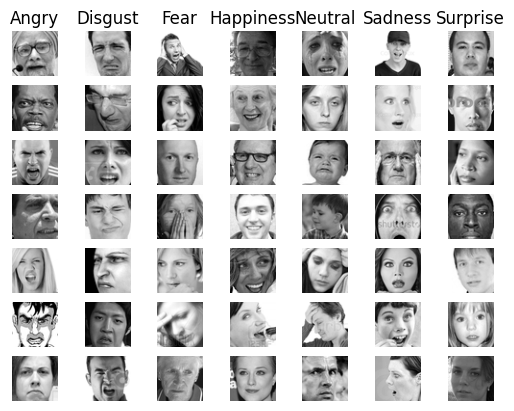

In [6]:
import numpy as np
import matplotlib.pyplot as plt
N_CLASSES=len(CLASSES)
fig,axes=plt.subplots(nrows=N_CLASSES, ncols=N_CLASSES)
for row in range(N_CLASSES):
    for col in range(N_CLASSES):
        pixels=df[df['emotion']==CLASSES[col]].values[row+1*col+1,:-1]
        img=pixels.reshape((48,48)).astype(np.uint8)
        axes[row][col].imshow(img,cmap='gray')
        axes[row][col].axis('off')
        if row==0:
            axes[row][col].set_title(CLASSES[col])

In [7]:
### BUILDING DEEP LEARNING MODEL###
INPUT_SIZE =(48,48,1)
model=Sequential(name='emotion_recognizer')
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=INPUT_SIZE))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(N_CLASSES,activation='softmax'))
model.summary()


Model: "emotion_recognizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              31720448  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)       

In [8]:
### PREPARAING TRAIN DARA ###
from tensorflow.python.keras.utils.np_utils import to_categorical
df['emotion'].replace({v:k for k,v in CLASSES.items()},inplace=True)
x=df.values[:,:-1].reshape((len(df),*INPUT_SIZE))
y=df.values[:,-1]
y_cat=to_categorical(y,N_CLASSES)
print('[INFO] Input Data Shape ::{0}',format(x.shape))
print('[INFO] Input Data Shape::{0}',format(y_cat.shape))


[INFO] Input Data Shape ::{0} (3500, 48, 48, 1)
[INFO] Input Data Shape::{0} (3500, 7)


In [9]:
### COMPILING MODEL FOR TRAINING ###
model.compile(optimizer=RMSProp(), loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
### MODEL TRAINING ###
import tensorflow as tf
tf.config.run_functions_eagerly(True)
model.fit(x,y_cat,epochs=10,batch_size=32,validation_split=0.3)

Epoch 1/10
77/77 [==============================] - 315s 4s/step - loss: 2.0066 - accuracy: 0.2661 - val_loss: 14.9047 - val_accuracy: 0.0076
Epoch 2/10
77/77 [==============================] - 354s 5s/step - loss: 1.5583 - accuracy: 0.3400 - val_loss: 20.1116 - val_accuracy: 0.0029
Epoch 3/10
77/77 [==============================] - 318s 4s/step - loss: 1.6846 - accuracy: 0.4355 - val_loss: 27.4315 - val_accuracy: 0.0038
Epoch 4/10
77/77 [==============================] - 345s 4s/step - loss: 1.3603 - accuracy: 0.4967 - val_loss: 54.4490 - val_accuracy: 0.0048
Epoch 5/10
77/77 [==============================] - 310s 4s/step - loss: 1.1591 - accuracy: 0.5633 - val_loss: 99.9482 - val_accuracy: 0.0086
Epoch 6/10
77/77 [==============================] - 306s 4s/step - loss: 1.1911 - accuracy: 0.6000 - val_loss: 89.0975 - val_accuracy: 0.0067
Epoch 7/10
77/77 [==============================] - 329s 4s/step - loss: 1.0425 - accuracy: 0.6294 - val_loss: 180.2041 - val_accuracy: 0.0067
Epoch

KeyboardInterrupt: 

In [10]:
### SAVING MODEL TO FILE  ###
model.save('Resources/model.h5')                                              


In [11]:
###  LOADING PRE-TRAINED MODEL SAVED FILE ###
from keras.models import load_model
model=load_model('Resources/model.h5')
model.summary()


Model: "emotion_recognizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 1024)              31720448  
                                                

In [12]:
import cv2 as cv

1/1 [==============================] - 1s 509ms/step


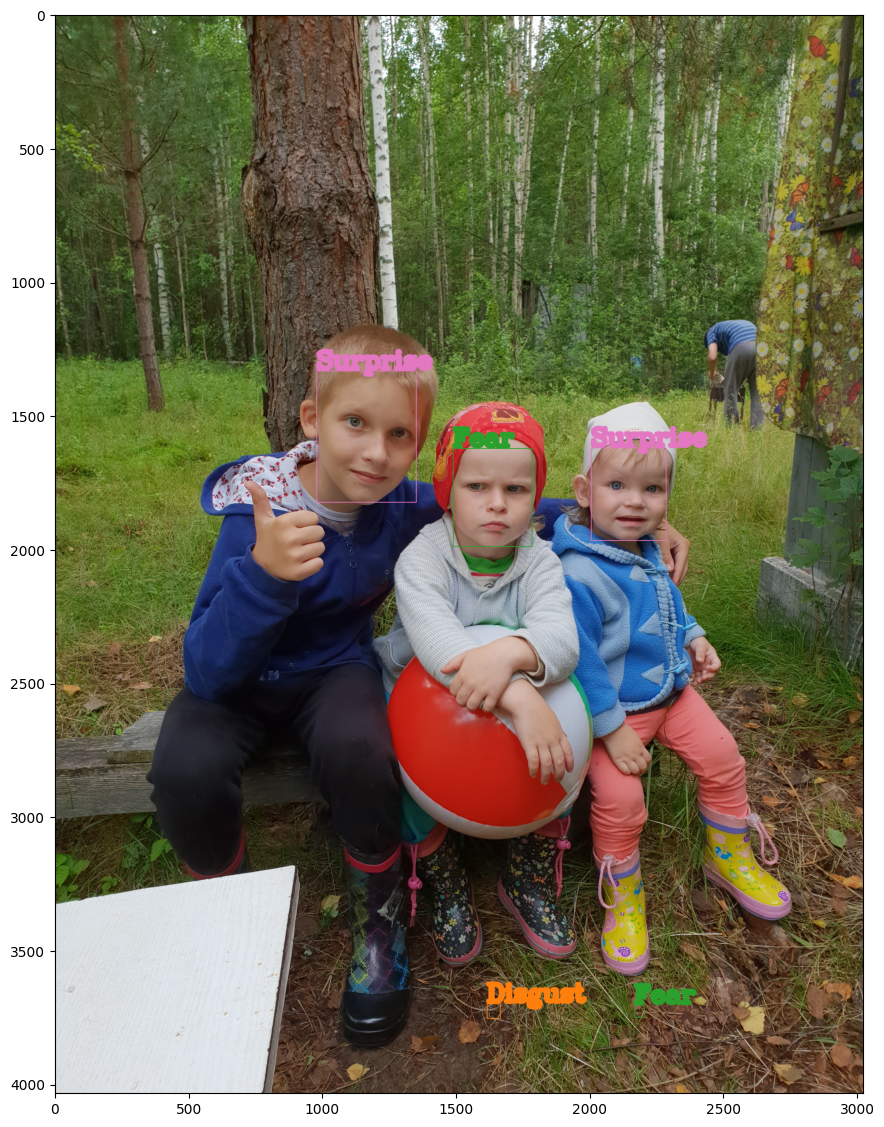

In [15]:
###  PREDICTION USING TRAINED MODEL ###
import matplotlib.pyplot as plt
import mtcnn
mtcnn_model=mtcnn.MTCNN()
colors=[(31,119,180),(255,127,14),
        (44,160,44),(219,39,40),(140,103,189),(140,86,75),(227,119,194)]
img=cv.imread('C:/Users/````````````````````/Desktop/ComputerVision/Resources\Resources/Photos/boys.jpg')
img_rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
boxes=mtcnn_model.detect_faces(img_rgb)
faces=[]
for box in boxes:
    x,y,w,h=box['box']
    face=img_rgb[y:y+h,x:x+w]
    face=cv.cvtColor(cv.resize(face,INPUT_SIZE[:-1]),cv.COLOR_RGB2GRAY)
    faces.append(face)
data=np.array(faces).reshape(len(faces),*INPUT_SIZE)
data=data/255.0
scores=model.predict(data)
class_idx=np.argmax(scores,axis=1)
for idx,box in zip(class_idx,boxes):
    x,y,w,h=box['box']
    cv.rectangle(img_rgb,(x,y),(x+w,y+h),colors[idx],2)
    cv.putText(img_rgb,CLASSES[idx],(x,y-10),cv.FONT_HERSHEY_COMPLEX,3,colors[idx],20)
plt.figure(figsize=(14,14))
plt.imshow(img_rgb)